<a href="https://colab.research.google.com/github/EricAlcarazdelPico/deep-learning-with-python-personal-workflow/blob/main/binary_classification_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying movie reviews: The IMDB dataset


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels.shape

(25000,)

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_target = np.asarray(train_labels).astype("float32")
test_target = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
valid_data = x_train[:10000]
train_data = x_train[10000:]
valid_target = train_target[:10000]
train_target = train_target[10000:]

**Training your model**

In [ ]:
history = model.fit(train_data,
                    train_target,
                    epochs=20,
                    batch_size=512,
                    validation_data=(valid_data, valid_target))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5318 - accuracy: 0.7886 - val_loss: 0.4029 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3138 - accuracy: 0.9015 - val_loss: 0.3086 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2287 - accuracy: 0.9251 - val_loss: 0.3277 - val_accuracy: 0.8644
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1785 - accuracy: 0.9416 - val_loss: 0.3036 - val_accuracy: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1493 - accuracy: 0.9501 - val_loss: 0.2787 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1211 - accuracy: 0.9627 - val_loss: 0.2894 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1006 - accuracy: 0.9685 - val_loss: 0.3134 - val_accuracy: 0.8814
Epoch 8/20
30

In [ ]:
history_dict = history.history

**Plotting the training and validation loss**

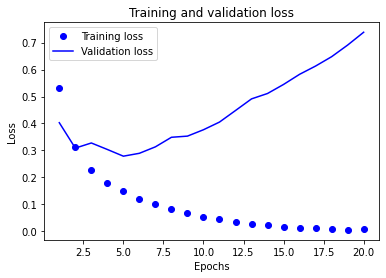

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

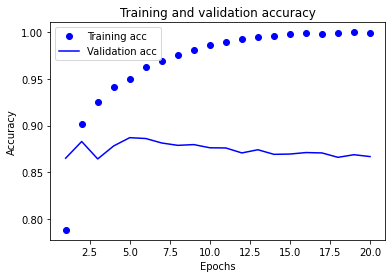

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_data, train_target, epochs=4, batch_size=512)
results = model.evaluate(test_data, test_target)

Epoch 1/4
30/30 [==============================] - 1s 12ms/step - loss: 0.5165 - accuracy: 0.7833
Epoch 2/4
30/30 [==============================] - 0s 12ms/step - loss: 0.3021 - accuracy: 0.9028
Epoch 3/4
30/30 [==============================] - 0s 12ms/step - loss: 0.2174 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2944 - accuracy: 0.8827


In [ ]:
results

[0.29438456892967224, 0.8826799988746643]

### Generate predictions on test data

In [ ]:
model.predict(test_data)

array([[0.29827034],
       [0.99977046],
       [0.98000205],
       ...,
       [0.12661767],
       [0.18600358],
       [0.6424804 ]], dtype=float32)